In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six

In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv","nonlinearmodel_fit_table.csv"]

In [4]:
rois = []
for model in models:
    df = pd.read_csv(tbpath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())
    
rois = list(set(rois))

In [5]:
dfreport = pd.DataFrame(columns=['Region', 'Model','median IFR0','CI lower','CI upper','median IFRc','CI lower','CI upper','delta weeks'])
k = -1
for roi in rois:
    k += 1
    model = "fulllinearmodel_fit_table.csv" 
    df = pd.read_csv(tbpath + model)
    theta = "ifr (week 0)"
    try:
        measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
        measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
        measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
        x = [roi,model.split('_fit_table.csv')[0],np.round(measure1,4),np.round(measure2,4),np.round(measure3,4)]
        #find latest week with data
    #     maxweek = 11
        for i in np.arange(11,0,-1):
            theta = 'ifr (week '+str(i)+')'
            x2 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
            if np.isfinite(x2):
    #             print(x2)
                measure1 = df.loc[(df.roi==roi)&(df['quantile']==0.5),theta].values[0]
                measure2 = df.loc[(df.roi==roi)&(df['quantile']==0.025),theta].values[0]
                measure3 = df.loc[(df.roi==roi)&(df['quantile']==0.975),theta].values[0]
                x += [np.round(measure1,4),np.round(measure2,4),np.round(measure3,4),i]
                break
    except:
        print(roi)
    try:
        dfreport.loc[k] = x
    except:
        print(roi)

Gambia


0.0049
0.025    0.00132
0.500    0.00490
0.975    0.03832
Name: median IFR0, dtype: float64
0.0228
0.025    0.00190
0.500    0.02280
0.975    0.13738
Name: median IFRc, dtype: float64


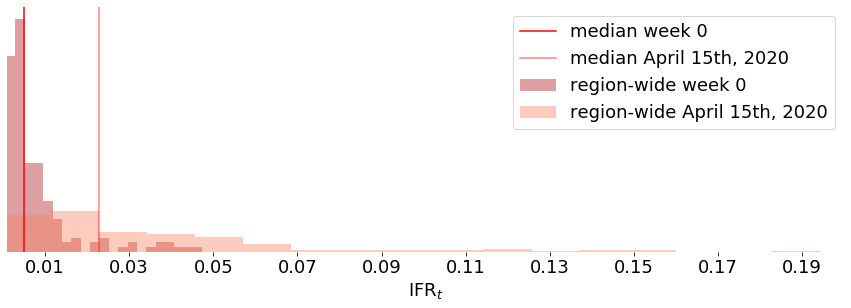

In [7]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

c_ = sns.color_palette('Reds')
f,ax = plt.subplots(1,1,figsize=(15,5))

#IFR0
sns.distplot(dfreport['median IFR0'],color = c_[5],ax=ax, kde=False, norm_hist=True, label='region-wide week 0')
mu = np.median(dfreport['median IFR0'].values)
ax.axvline(mu, color='r',label='median week 0')
print(mu)
print(dfreport['median IFR0'].quantile(q=[0.025,0.5,0.975]))

#IFRt
sns.distplot(dfreport['median IFRc'],color = c_[2],ax=ax, kde=False, norm_hist=True, label='region-wide April 15th, 2020')
mu = np.median(dfreport['median IFRc'].values)
ax.axvline(mu, color='r',alpha=0.5,label='median April 15th, 2020')
print(mu)
print(dfreport['median IFRc'].quantile(q=[0.025,0.5,0.975]))


ax.set_xlim((0.001,0.2))
plt.legend()

ax.get_yaxis().set_visible(False)
ax.set_xlabel('')
plt.subplots_adjust(hspace=0.8,bottom=0.2)

x = np.array(list(np.arange(0.01,0.2,0.02)))
ax.set_xticks(x)
ax.set_xlabel(r'IFR$_{t}$')
simpleaxis(plt.gca())
plt.savefig(productpath + 'ifrpastpresent.png')